In [21]:
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sam = sam_model_registry["vit_h"](checkpoint="sam_weights/sam_vit_h_4b8939.pth")

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [8]:
sam = sam.to(device)

In [13]:
image = cv2.imread('sample_image/sample_image1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

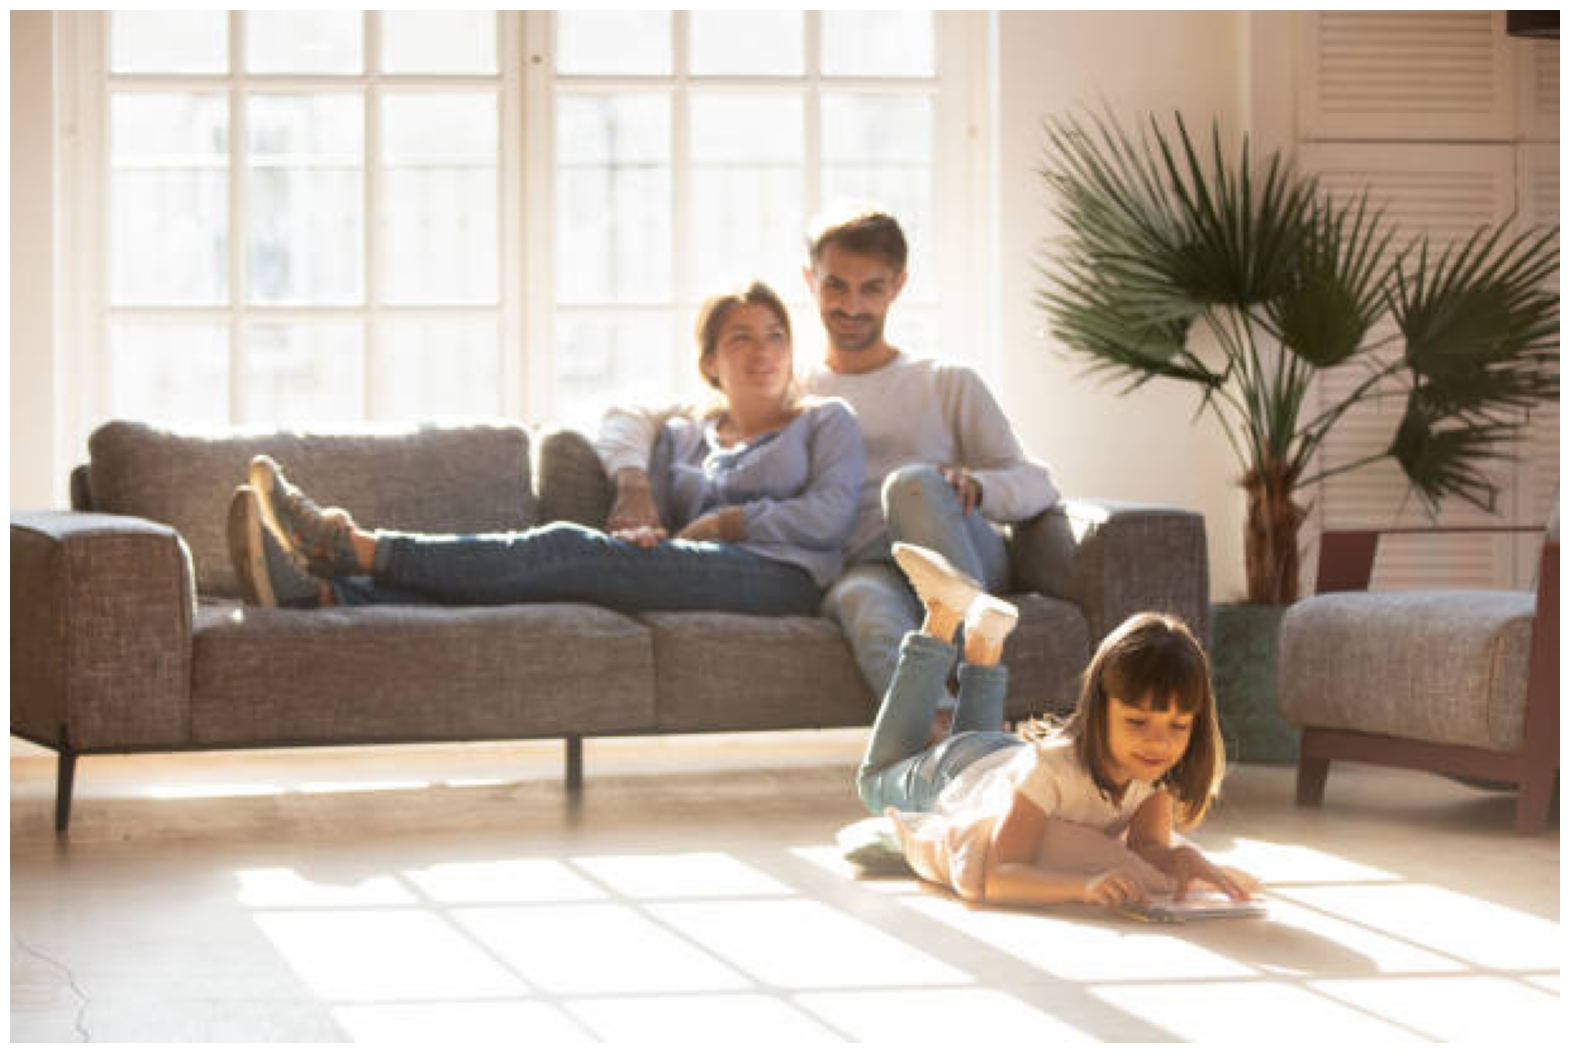

In [16]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [17]:
predictor = SamPredictor(sam)

mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

In [19]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

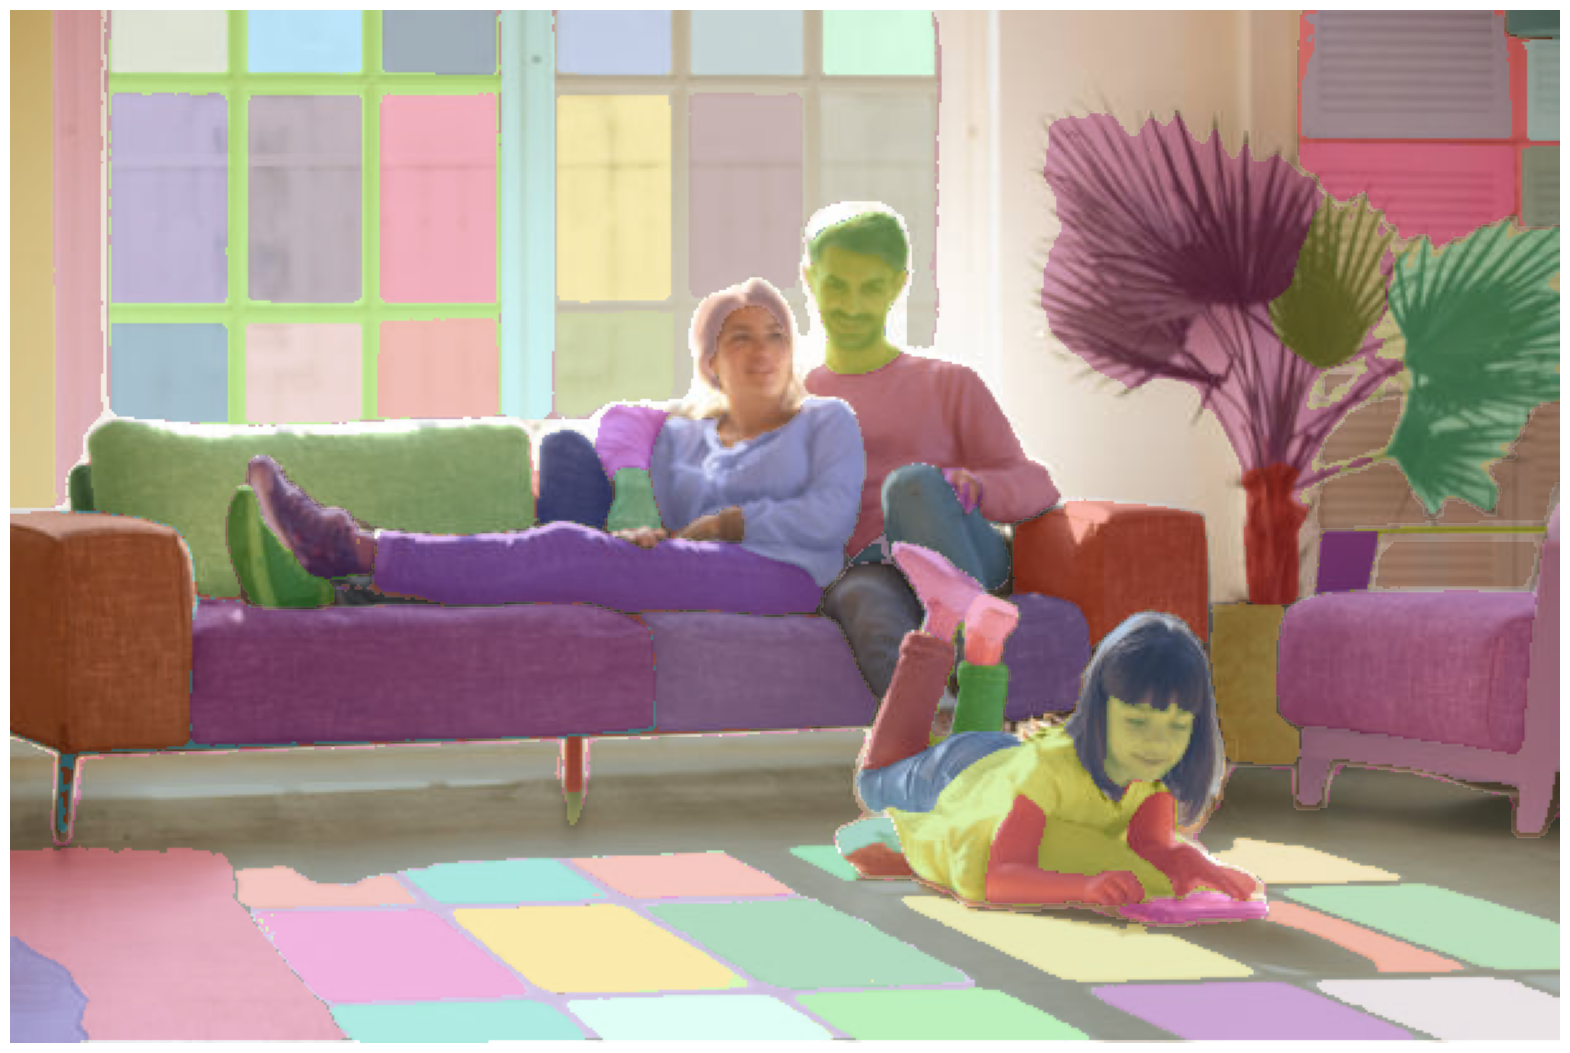

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

In [24]:
from diffusers import StableDiffusionInpaintPipeline

In [23]:
sam = sam_model_registry["vit_h"](checkpoint="sam_weights/sam_vit_h_4b8939.pth")
device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam.to(device)
predictor = SamPredictor(sam)

In [26]:
pipe = StableDiffusionInpaintPipeline.from_pretrained("stabilityai/stable-diffusion-2-inpainting", torch_dtype = torch.float16)

In [27]:
pipe = pipe.to(device)